In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader


print(torch.__version__)

batch_size = 100
num_epochs = 5

# root = './MNIST_Fashion'
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
# train_data = dset.FashionMNIST(root=root, train=True, transform=transform, download=True)
# test_data = dset.FashionMNIST(root=root, train=False, transform=transform, download=True)
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, drop_last=True)


train_dataset = dset.FashionMNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       #transforms.RandomCrop(28, padding=0),
                       #transforms.RandomHorizontalFlip(),
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0.5,), std=(0.5,))
                   ]))
test_dataset =  dset.FashionMNIST('./data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0.5,), std=(0.5,))
                   ]))

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])
print(len(train_dataset), len(val_dataset), len(test_dataset))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=False)


print("hi")

1.8.1+cu101
50000 10000 10000
hi


## Inspecting Dataset

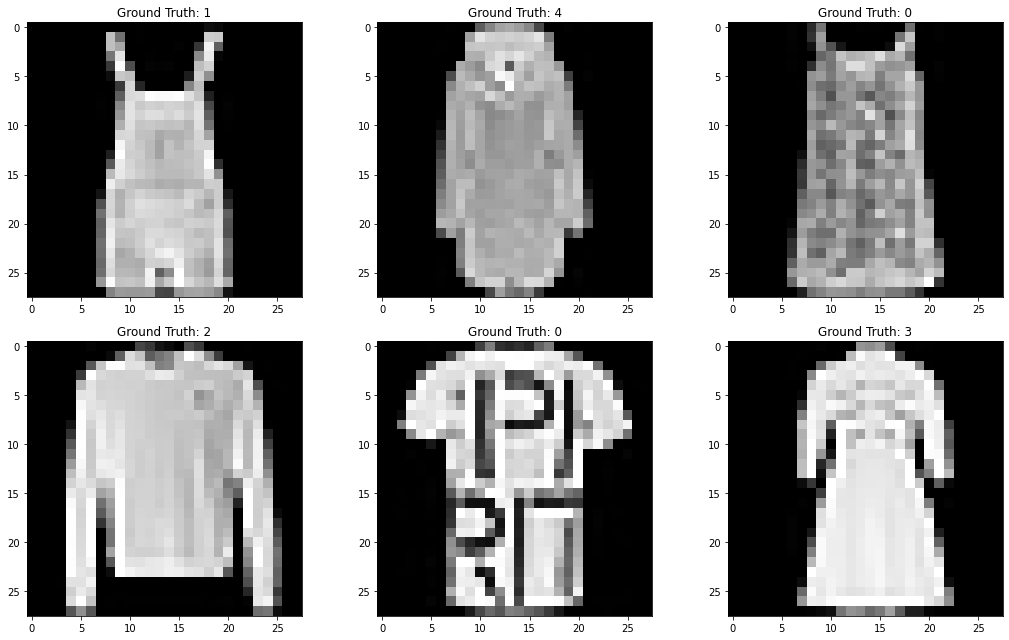

In [ ]:

examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)  

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i+1][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i+1]))
plt.show()

## 2. Model Architecture

In [ ]:
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        
        self.linears = nn.ModuleList()
        
        self.fc = nn.Linear(784, 584, bias=True)
        self.fc4 = nn.Linear(584, 328, bias=True)
        self.fc6 = nn.Linear(328, 256, bias=True)
        self.fc2 = nn.Linear(256, 128, bias=True)
        self.fc5 = nn.Linear(128, 96, bias=True)
        self.fc6 = nn.Linear(96, 64, bias=True)
        self.fc3 = torch.nn.Linear(64, 10, bias=True)
        self.act = nn.LeakyReLU(0.5)
        self.dropout = nn.Dropout(0.5) #Drop out

        self.layer1 = nn.Sequential(
            torch.nn.Linear(784, 584, bias=True),
            torch.nn.BatchNorm1d(584),
            torch.nn.PReLU()
        )
        self.layer2 = nn.Sequential(
            torch.nn.Linear(584, 328, bias=True),
            torch.nn.BatchNorm1d(328),
            torch.nn.PReLU()
        )
        self.layer3 = nn.Sequential(
            torch.nn.Linear(328, 256, bias=True),
            torch.nn.BatchNorm1d(256),
            torch.nn.PReLU()
        )
        self.layer4 = nn.Sequential(
            torch.nn.Linear(256, 128, bias=True),
            torch.nn.BatchNorm1d(128),
            torch.nn.PReLU()
        )
        self.layer5 = nn.Sequential(
            torch.nn.Linear(128, 64, bias=True),
            torch.nn.BatchNorm1d(64),
            torch.nn.PReLU()
            
        )
        self.layer6 = nn.Sequential(
            torch.nn.Linear(64, 10, bias=True)
        )



        '''
        self.fc = nn.Linear(self.in_dim, self.hid_dim, bias=True)
        for i in range(self.n_layer-1):
            self.linears.append(nn.Linear(self.hid_dim, self.hid_dim))
        self.fc2 = nn.Linear(self.hid_dim, self.out_dim, bias=True)
        '''
        
        
    def forward(self, x):
        x = x.view(x.size(0), -1)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)

        return x

    def weights_init(m):
        if isinstance(m, nn.Linear):
          nn.init.xavier_normal_(m.weight) 


## 3. Cost Function Define (Loss Function Define)

In [ ]:
cls_loss = nn.CrossEntropyLoss()

## 4. Model Definition

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
import time

# ====== Construct Model ====== #
model = MLPModel()

#******device 정의
print(torch.cuda.is_available())
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model.to(device)

#print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# ===== Construct Optimizer ====== #
lr = 0.0001
regularization = 0.00075
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay = regularization) 

True


## 5. Train & Validation & Test

Train Accuracy for 50000 images: 82.93%
Validation Accuracy for 10000 images: 86.41%
Epoch: 001 Cost = 0.710617959 Val_Cost = 0.475868762 

Train Accuracy for 50000 images: 86.67%
Validation Accuracy for 10000 images: 87.45%
Epoch: 002 Cost = 0.367895812 Val_Cost = 0.343457937 

Train Accuracy for 50000 images: 88.44%
Validation Accuracy for 10000 images: 88.32%
Epoch: 003 Cost = 0.315516293 Val_Cost = 0.315439641 

Train Accuracy for 50000 images: 89.24%
Validation Accuracy for 10000 images: 88.82%
Epoch: 004 Cost = 0.290908486 Val_Cost = 0.310587853 

Train Accuracy for 50000 images: 89.92%
Validation Accuracy for 10000 images: 88.71%
Epoch: 005 Cost = 0.271294743 Val_Cost = 0.310764253 

Number of 1481529 parameters


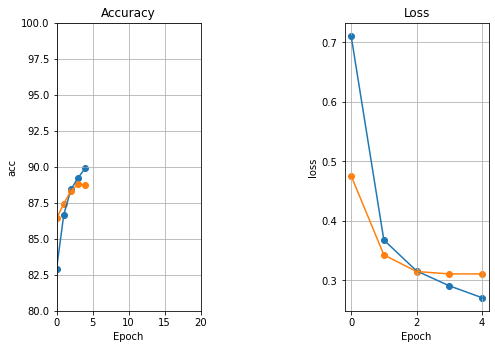

In [ ]:
costs = []
val_costs = []

total_batch = len(train_loader)
val_total_batch = len(val_loader)

list_epoch = [] 

list_train_loss = []
list_val_loss = []

list_val_acc = []
list_acc = []

fig, ax = plt.subplots(1, 2)
#fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0,  right=1, top=1, wspace=1, hspace=1)

for epoch in range(num_epochs):
    total_cost = 0
    correct = 0
    total = 0

    # Train
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)

        loss = cls_loss(outputs, labels)
        _, argmax = torch.max(outputs, 1)
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_cost += loss

    # Validation
    with torch.no_grad():
        model.eval()
        val_total_cost = 0
        val_correct = 0
        val_total = 0

        for i, (imgs, labels) in enumerate(val_loader):
          imgs, labels = imgs.to(device), labels.to(device)

          outputs = model(imgs)
          loss = cls_loss(outputs, labels)
          _, argmax = torch.max(outputs, 1)
          val_total += imgs.size(0)
          val_correct += (labels == argmax).sum().item()

          val_total_cost += loss
            
    print('Train Accuracy for {} images: {:.2f}%'.format(total, correct / total * 100)) 
    
    print('Validation Accuracy for {} images: {:.2f}%'.format(val_total, val_correct / val_total * 100))

    list_epoch.append(epoch)

    list_val_acc.append(val_correct / val_total*100)
    list_acc.append(correct/ total * 100)


    avg_cost = total_cost / total_batch
    val_avg_cost = val_total_cost / val_total_batch

    print("Epoch:", "%03d" % (epoch+1), "Cost =", "{:.9f}".format(avg_cost), "Val_Cost =", "{:.9f}".format(val_avg_cost), "\n")
    costs.append("{:.9f}".format(avg_cost))    
    val_costs.append("{:.9f}".format(val_avg_cost))
    
    #list_train_loss.cpu()
    #list_val_loss.cpu()
    list_train_loss.append(float("{:.3f}".format(avg_cost)))
    list_val_loss.append(float("{:.3f}".format(val_avg_cost)))

print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# Train Plot
ax[0].scatter(list_epoch, list_acc)
ax[0].plot(list_epoch, list_acc)

ax[1].scatter(list_epoch, list_train_loss)
ax[1].plot(list_epoch, list_train_loss)

# Validation Plot
ax[0].scatter(list_epoch, list_val_acc)
ax[0].plot(list_epoch, list_val_acc)

ax[1].scatter(list_epoch, list_val_loss)
ax[1].plot(list_epoch, list_val_loss)

# Matplot Preferences
ax[0].set_title("Accuracy")
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].set_title("Loss")
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('loss')

ax[0].grid()
ax[1].grid()
ax[0].axis([0, 20, 80, 100])
#ax[1].axis([0, 20, 0, 1])

plt.show()

In [ ]:
# Test
with torch.no_grad():
    model.eval()
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, argmax = torch.max(outputs, 1)
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()
    
    print('Accuracy for {} images: {:.2f}%'.format(total, correct / total * 100)) 
    print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

Accuracy for 10000 images: 87.49%
Number of 1481529 parameters


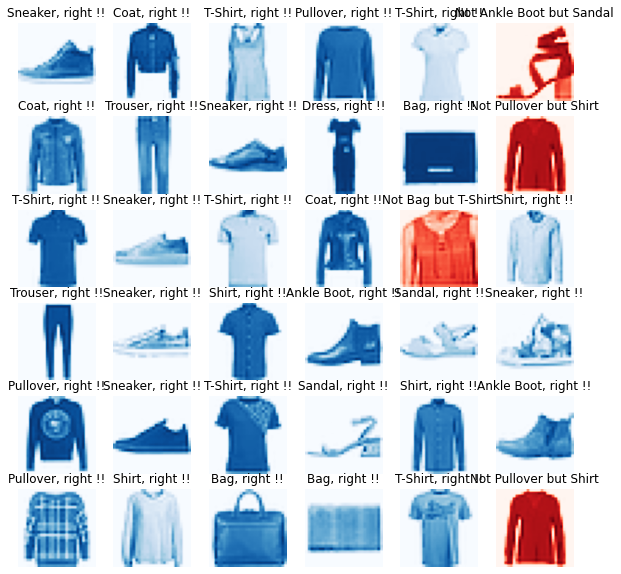

In [ ]:
label_tags = {
    0: 'T-Shirt', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt',
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle Boot'
}
columns = 6
rows = 6
fig = plt.figure(figsize=(10,10))
 
model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(test_dataset))
    input_img = test_dataset[data_idx][0].unsqueeze(dim=0).to(device) 
 
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = label_tags[argmax.item()]
    label = label_tags[test_dataset[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right !!')
        cmap = 'Blues'
    else:
        plt.title('Not ' + pred + ' but ' +  label)
        cmap = 'Reds'
    plot_img = test_dataset[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')
    
plt.show() 